In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# open file
# open txt file for getting daily averages
# open nc file to get attributes

filename = 'co2_abt_surface-insitu_6_allvalid'
# 1, nc file
directory = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_nc/data/nc/'
ds = xr.open_dataset(directory + filename + '.nc')
ds

<xarray.Dataset>
Dimensions:                (calendar_components: 6, dim_concerns: 3, obs: 33867)
Dimensions without coordinates: calendar_components, dim_concerns, obs
Data variables:
    time                   (obs) datetime64[ns] ...
    time_decimal           (obs) float64 ...
    time_components        (obs, calendar_components) float64 ...
    solartime_components   (obs, calendar_components) float64 ...
    value                  (obs) float32 ...
    nvalue                 (obs) float64 ...
    value_std_dev          (obs) float32 ...
    latitude               (obs) float32 ...
    longitude              (obs) float32 ...
    altitude               (obs) float32 ...
    elevation              (obs) float32 ...
    intake_height          (obs) float32 ...
    obs_flag               (obs) float64 ...
    assimilation_concerns  (obs, dim_concerns) int32 ...
    obs_num                (obs) int32 ...
    obspack_num            (obs) int32 ...
    obspack_id             (obs) |S200 ...
    CT_RMSE                (obs) float32 ...
    CT_assim               (obs) int32 ...
    CT_MDM                 (obs) float32 ...
    CT_sampling_strategy   (obs) int32 ...
    CT_may_localize        (obs) int32 ...
    CT_may_reject          (obs) int32 ...
Attributes:
    site_code:                                    ABT
    site_name:                                    Abbotsford, British Columbia
    site_country:                                 Canada
    site_country_flag:                            CANA0001.GIF
    site_latitude:                                49.0114
    site_longitude:                               -122.3353
    site_elevation:                               100.0
    site_elevation_unit:                          masl
    site_position_comment:                        This is the nominal locatio...
    site_utc2lst:                                 -8.0
    site_utc2lst_comment:                         Add 'site_utc2lst' hours to...
    dataset_creation_date:                        2019-08-12T14:42:42.253127
    dataset_num:                                  200
    dataset_name:                                 co2_abt_surface-insitu_6_al...
    dataset_globalview_prefix:                    abt_06C0
    dataset_process:                              passthru
    dataset_parameter:                            co2
    dataset_project:                              surface-insitu
    dataset_platform:                             fixed
    dataset_map:                                  map_abt_surface-insitu_6.png
    dataset_selection:                            all valid hours at highest ...
    dataset_selection_tag:                        allvalid
    dataset_comment:                              Environment Canada data are...
    dataset_calibration_scale:                    WMO CO2 X2007
    dataset_start_date:                           2014-03-07T11:30:00Z
    dataset_stop_date:                            2018-12-31T23:30:00Z
    dataset_data_frequency:                       1
    dataset_data_frequency_unit:                  hour
    dataset_description:                          This data package is intend...
    dataset_reference_total_listed:               1
    dataset_reference_1_name:                     Worthy, D.E., K.Higuchi, an...
    dataset_contribution:                         These data are provided by ...
    lab_total_listed:                             1
    lab_1_number:                                 6
    lab_1_abbr:                                   EC
    lab_1_name:                                   Environment and Climate Cha...
    lab_1_address1:                               Climate Research Division
    lab_1_address2:                               4905 Dufferin Street 
    lab_1_address3:                               Toronto, Ontario M3H 5T4
    lab_1_country:                                Canada
    lab_1_parameter:                              Lab has contributed measure...
    lab_1_

In [3]:
# 2, txt file
directory = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_txt/data/txt/'
data = pd.read_csv(directory + filename + '.txt', sep=' ', header =  166)
data

,year,month,day,hour,minute,second,time,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,obs_flag,obs_num,obspack_num,obspack_id
0,2014,3,7,11,30,0,1394191800,2014.179395,0.000413,1.833000e-07,42,49.0114,-122.335,133.0,100.0,33.0,0,1,4830225,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
1,2014,3,7,12,30,0,1394195400,2014.179509,0.000413,7.020000e-08,57,49.0114,-122.335,133.0,100.0,33.0,0,2,4830226,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
2,2014,3,7,13,30,0,1394199000,2014.179623,0.000414,4.179000e-07,57,49.0114,-122.335,133.0,100.0,33.0,0,3,4830227,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
3,2014,3,7,14,30,0,1394202600,2014.179737,0.000415,1.836000e-07,57,49.0114,-122.335,133.0,100.0,33.0,0,4,4830228,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
4,2014,3,7,15,30,0,1394206200,2014.179852,0.000416,7.717000e-07,57,49.0114,-122.335,133.0,100.0,33.0,0,5,4830229,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33862,2018,12,31,19,30,0,1546284600,2018.999486,0.000416,1.191000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33863,4864087,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33863,2018,12,31,20,30,0,1546288200,2018.999600,0.000416,1.639000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33864,4864088,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33864,2018,12,31,21,30,0,1546291800,2018.999715,0.000416,1.886000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33865,4864089,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33865,2018,12,31,22,30,0,1546295400,2018.999829,0.000417,1.227800e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,33866,4864090,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...


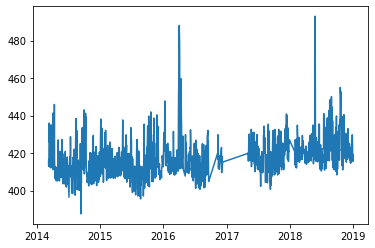

In [4]:
daily_mean = data.groupby(['year','month','day']).mean()
plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)

In [5]:
data_2018 = data[data.year == 2018]
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
data_2018

,year,month,day,hour,minute,second,time,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,obs_flag,obs_num,obspack_num,obspack_id
26455,2018,1,28,6,30,0,1517121000,2018.074715,0.000426,2.346900e-06,10,49.0114,-122.335,133.0,100.0,33.0,0,26456,4856680,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
26456,2018,1,28,7,30,0,1517124600,2018.074829,0.000425,1.536900e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,26457,4856681,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
26457,2018,1,28,8,30,0,1517128200,2018.074943,0.000424,1.007700e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,26458,4856682,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
26458,2018,1,28,9,30,0,1517131800,2018.075057,0.000428,1.434200e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,26459,4856683,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
26459,2018,1,28,10,30,0,1517135400,2018.075171,0.000422,1.474600e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,26460,4856684,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33862,2018,12,31,19,30,0,1546284600,2018.999486,0.000416,1.191000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33863,4864087,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33863,2018,12,31,20,30,0,1546288200,2018.999600,0.000416,1.639000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33864,4864088,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33864,2018,12,31,21,30,0,1546291800,2018.999715,0.000416,1.886000e-07,60,49.0114,-122.335,133.0,100.0,33.0,1,33865,4864089,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...
33865,2018,12,31,22,30,0,1546295400,2018.999829,0.000417,1.227800e-06,60,49.0114,-122.335,133.0,100.0,33.0,0,33866,4864090,obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12~c...


In [6]:
daily_mean = data_2018.groupby(['month','day']).mean()
type(daily_mean)

pandas.core.frame.DataFrame

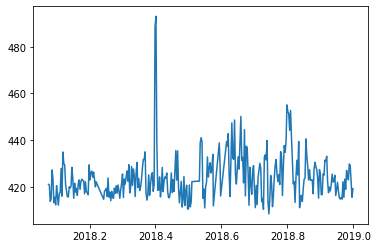

In [7]:
plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)

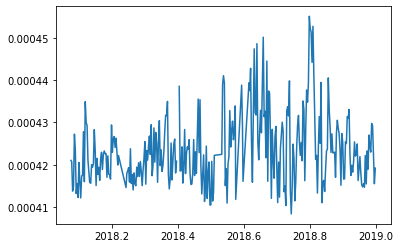

In [8]:
# get rid of that extreme value
s = daily_mean['value']
daily_mean['value'] = s.where(s < 0.00046, float('nan'))
plt.plot(daily_mean['time_decimal'], daily_mean['value'])

In [54]:
daily_mean.reset_index(inplace = True)

ValueError: cannot insert level_0, already exists

In [76]:
date = np.arange('2018-01-01', '2019-01-01', dtype='datetime64[D]')
daily = xr.DataArray(float('nan'), coords=[date], dims=['date']) 

daily.loc['2018-03-01'] = 1.
daily

<xarray.DataArray (date: 365)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])
Coordinates:
  * date     (date) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31

In [85]:
for iloc in range(len(daily_mean)):
    imonth = int(daily_mean.iloc[iloc].month)
    if(imonth < 10): imonth = '0' + str(imonth)
    iday = int(daily_mean.iloc[iloc].day)
    if(iday < 10): iday = '0' + str(iday)
    date = '2018-' + str(imonth) + '-' + str(iday)

    daily.loc[date] = daily_mean.iloc[iloc].value*1e6

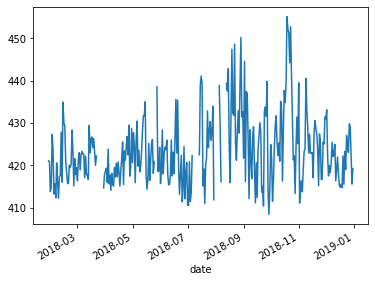

In [87]:
daily.plot()